<h3 style=color:orange>Week 8: Model Evaluation and Tuning</h3>

Problem:
We’ll simulate a binary classification dataset for predicting whether a customer will buy a product (1) or not (0), based on:

Age

Annual Income

Past Purchases

In [1]:
# Week 8 – Model Evaluation & Tuning (Classification Example)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

sns.set(style="whitegrid")
np.random.seed(42)


In [2]:
# Simulated binary classification data
n = 300
age = np.random.randint(18, 60, n)
income = np.random.normal(50000, 15000, n)
purchases = np.random.randint(0, 10, n)
buy = (income > 55000).astype(int)  # simple rule to generate labels

# Add noise
buy[np.random.choice(n, 40, replace=False)] = np.random.randint(0, 2, 40)

# Create DataFrame
df = pd.DataFrame({
    "age": age,
    "income": income,
    "past_purchases": purchases,
    "buy": buy
})

df.head()


,age,income,past_purchases,buy
0,56,62751.808732,7,0
1,46,55915.099272,5,1
2,32,49929.560080,9,0
3,25,26437.820247,6,0
4,38,72197.731628,7,1


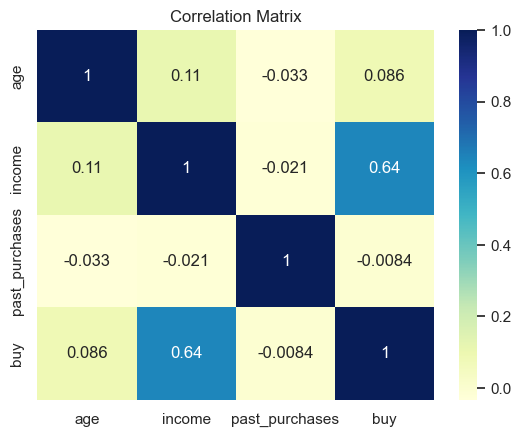

In [3]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()


In [4]:
X = df[["age", "income", "past_purchases"]]
y = df["buy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.95      0.86      0.90        22

    accuracy                           0.93        60
   macro avg       0.94      0.92      0.93        60
weighted avg       0.93      0.93      0.93        60



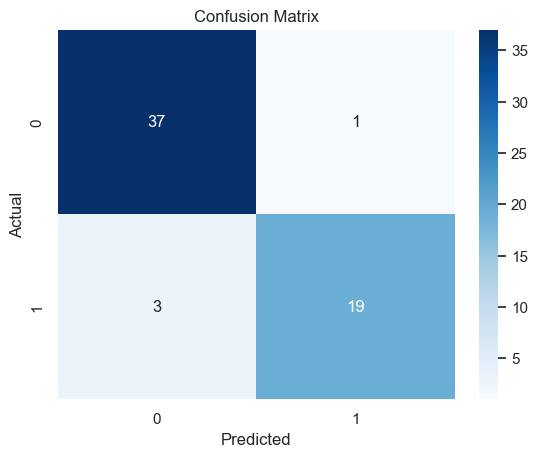

In [6]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [7]:
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV Score:", np.mean(cv_scores))


Cross-validation scores: [0.9  0.95 0.85 0.95 0.9 ]
Average CV Score: 0.9100000000000001


In [8]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 50}


In [9]:
best_model = grid_search.best_estimator_
y_best_pred = best_model.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, y_best_pred))
print("Final Classification Report:\n", classification_report(y_test, y_best_pred))


Final Accuracy: 0.9333333333333333
Final Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.95      0.86      0.90        22

    accuracy                           0.93        60
   macro avg       0.94      0.92      0.93        60
weighted avg       0.93      0.93      0.93        60

